In [5]:
import numpy as np
print("Numpy Version : {}".format(np.__version__))
import matplotlib 
print("Matplotlib Version : {}".format(matplotlib.__version__))
import matplotlib.pyplot as plt

Numpy Version : 1.14.3
Matplotlib Version : 2.2.2


# Numpy를 활용한 선형대수 입문

###  선형대수
* 데이터 분석에 필요한 각종 계산을 돕기 위한 학문이다.
* 선형대수를 사용하면 대량의 데이터를 포함하는 복잡한 계산을 간단한 수식으로 서술할 수 있다.

### 데이터의 유형
* 스칼라(scalar) : 숫자 하나로 이루어진 데이터
* 벡터(vector) : 여러 개의 숫자로 이루어진 데이터 레코드
* 행렬(matrix) : 벡터가 여러 개 있는 데이터 집합

### 스칼라
* 스칼라는 보통 $x$와 같이 알파벳 소문자로 표기하며 실수(real number)인 숫자 중의 하나이므로 실수 집합 $\mathbf{R}$의 원소라는 의미에서 다음처럼 표기한다.

$$ x \in \mathbf{R} $$

### 벡터
벡터는 여러 개의 숫자가 특정한 순서대로 모여 있는 것을 말한다. 사실 대부분의 데이터 레코드는 여러 개의 숫자로 이루어진 경우가 많다. 예를 들어 붓꽃의 종을 알아내기 위해 크기를 측정할 때, 꽃잎의 길이 $x_1$뿐 아니라 꽃잎의 폭 $x_2$, 꽃받침의 길이 $x_3$, 꽃받침의 폭 $x_4$라는 4개의 숫자를 측정할 수도 있다. 이렇게 측정된 4개의 숫자는 한 송이의 붓꽃에서 나온 데이터이므로 따로따로 다루기보다는 하나의 쌍(tuple)으로 묶어놓는 것이 좋다. 이때 숫자의 순서가 바뀌면 어떤 숫자가 꽃잎의 길이이고 어떤 숫자가 꽃받침의 폭인지 알 수 없으므로 숫자의 순서를 유지하는 것이 중요하다. 이런 데이터 묶음을 선형대수에서는 벡터라고 부른다. 

붓꽃의 예에서는 4개의 데이터 $(x_1, x_2, x_3, x_4)$가 하나로 묶여 있는데 이를 선형 대수 기호로는 다음처럼 하나의 문자 $x$로 표기한다.

$$ 
x = \begin{bmatrix}
x_{1} \\
x_{2} \\
x_{3} \\
x_{4} \\
\end{bmatrix}
$$

이때 벡터는 복수의 가로줄, 즉 행(row)을 가지고 하나의 세로줄, 즉 열(column)을 가지는 형태로 위에서 아래로 내려써서 표기해야 한다.

하나의 벡터를 이루는 데이터의 개수를 **차원(dimension)**이라고 한다. 위에서 예로 든 $x$는 4개의 실수로 이루어져 있으므로 4차원 실수 벡터라고 하고 다음처럼 표기한다.

$$ x \in \mathbf{R}^4 $$

만약 4개가 아니라 $N$개의 숫자가 모여 있는 경우의 표기는 다음과 같다.

$$ 
x = \begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{N} \\
\end{bmatrix}
,\;\;\;\;
x \in \mathbf{R}^N
$$

벡터의 원소가 되는 스칼라 값은 ${}_1$, ${}_2$ 등의 자연수 아래 첨자(sub-script)를 붙여서 원소의 위치를 표시한다.
하지만 자연수 아래 첨자가 있다고 무조건 스칼라는 아니다. 마찬가지로 벡터가 여러 개 있으면 서로 다른 벡터를 구별하기 위해 벡터 이름에 아래 첨자를 붙일 수도 있다. 따라서 아래 첨자를 가진 알파벳 소문자 기호는 스칼라일 수도 있고 벡터일 수도 있다. 두 경우는 문맥에 따라 구별해야 한다. 때에 따라서는 스칼라가 아닌 벡터라는 점을 강조하기 위해 볼드체 기호 $\mathbf{x}$를 사용하기도 한다.

$$ \mathbf{x}  = \begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{N} \\
\end{bmatrix} $$

예를 들어 어떤 붓꽃 표본 한 송이를 꺾어 측정하였더니, 꽃잎의 길이가 5.1cm, 꽃잎의 폭이 3.5cm, 꽃받침의 길이가 1.5cm, 꽃받침의 폭이 0.2cm였다면 이 데이터 쌍을 $x_1$이라고 이름 붙이고 다음처럼 나타낼 수도 있다. 

$$  x_1 = 
\begin{bmatrix}
5.1 \\
3.5 \\
1.4 \\
0.2 \\  
\end{bmatrix}
$$

또 다른 붓꽃은는 다음처럼 다른 데이터를 가질 수 있다.

$$  x_2 = 
\begin{bmatrix}
4.9 \\
3.0 \\
1.4 \\
0.2 \\
\end{bmatrix}
$$

만약 이 데이터를 이용하여 붓꽃의 종을 결정하는 예측 문제를 풀고 있다면 이러한 데이터 벡터를 **특징 벡터(feature vector)**라고 한다. NumPy를 사용하여 벡터를 표현할 때는 벡터를 열의 개수가 하나인 2차원 배열 객체로 표현하는 것이 올바르다. 예를 들어 위의 벡터 $x_1$을 NumPy로 표기하면 다음과 같다.

In [3]:
x1 = np.array([[5.1], [3.5], [1.4], [0.2]])
x1

array([[5.1],
       [3.5],
       [1.4],
       [0.2]])

* Numpy는 1차원 배열 객체도 대부분 벡터로 인정한다.(이 때 벡터가 마치 하나의 행처럼 표시되어도 실제로는 열이라는 점에 주의)

In [4]:
x1 = np.array([5.1, 3.5, 1.4, 0.2])
x1

array([5.1, 3.5, 1.4, 0.2])

* 그러나 벡터 데이터를 처리하는 프로그램에 따라서 두 가지 표현법 중 열 표기를 정확하게 요구하는 경우도 있으므로 주의해야 한다. 예를 들어  Scikit-learn 패키지에서 벡터를 요구하는 경우에는 반드시 열의 개수가 1개인 2차원 배열 객체를 넣어야 한다.

* 에측 문제의 입력 데이터는 대부분 벡터로 표시한다.
* 이미지는 원래 2차원 데이터이지만 1차원 벡터로 변환할 수 있다.
* 같은 숫자에 대한 벡터가 서로 닮았다는 점에 주의하라

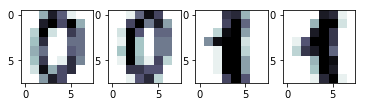

In [10]:
#  다음은 8x8 차원의 숫자 0과 1 이미지 4개를 64차원의 벡터로 펼친 것이다.
from sklearn.datasets import load_digits

digits = load_digits()
d0 = digits.images[0]
d1 = digits.images[10]
d2 = digits.images[1]
d3 = digits.images[11]

f, ax = plt.subplots(1, 4)
ax[0].imshow(d0, interpolation='nearest', cmap=plt.cm.bone_r)
ax[0].grid(False)
ax[1].imshow(d1, interpolation='nearest', cmap=plt.cm.bone_r)
ax[1].grid(False)
ax[2].imshow(d2, interpolation='nearest', cmap=plt.cm.bone_r)
ax[2].grid(False)
ax[3].imshow(d3, interpolation='nearest', cmap=plt.cm.bone_r)
ax[3].grid(False)
plt.show()

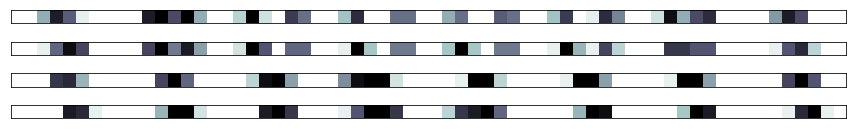

In [11]:
v0 = d0.reshape(64, 1)
v1 = d1.reshape(64, 1)
v2 = d2.reshape(64, 1)
v3 = d3.reshape(64, 1)

f, ax = plt.subplots(4, 1, figsize=(12, 2))
ax[0].imshow(v0.T, interpolation='nearest', cmap=plt.cm.bone_r)
ax[0].grid(False); ax[0].set_xticks([]); ax[0].set_yticks([])
ax[1].imshow(v1.T, interpolation='nearest', cmap=plt.cm.bone_r)
ax[1].grid(False); ax[1].set_xticks([]); ax[1].set_yticks([])
ax[2].imshow(v2.T, interpolation='nearest', cmap=plt.cm.bone_r)
ax[2].grid(False); ax[2].set_xticks([]); ax[2].set_yticks([])
ax[3].imshow(v3.T, interpolation='nearest', cmap=plt.cm.bone_r)
ax[3].grid(False); ax[3].set_xticks([]); ax[3].set_yticks([])
plt.tight_layout()
plt.show()

### 행렬
* 복수의 차원을 가지는 데이터 레코드가 다시 여러 개 있는 경우의 데이터를 합쳐서 표기한 것이다.
* 행렬은 보통 $X$와 같이 알파벳 대문자로 표기한다.

In [15]:
%%tikz -l matrix,fit,calc -f png -s 1200,200 --scale=0.9

\path (-3,-1) grid (12,1);
\node (lhs) (0,0) {$X$ =}; 
\matrix (X) at (3,0) [matrix of math nodes,left delimiter={[},right delimiter={]}]
{
x_{1, 1} & x_{1, 2} & x_{1, 3} & x_{1, 4} \\
x_{2, 1} & x_{2, 2} & x_{2, 3} & x_{2, 4} \\
x_{3, 1} & x_{3, 2} & x_{3, 3} & x_{3, 4} \\
x_{4, 1} & x_{4, 2} & x_{4, 3} & x_{4, 4} \\
x_{5, 1} & x_{5, 2} & x_{5, 3} & x_{5, 4} \\
x_{6, 1} & x_{6, 2} & x_{6, 3} & x_{6, 4} \\
};
\node[draw,rectangle,red,very thick,inner sep=0,rounded corners=1pt,
      fit={(X-1-1) (X-1-2) (X-1-3) ($(X-1-4)+(0.5cm,0.4cm)$)}] {};

UsageError: Cell magic `%%tikz` not found.


행렬의 원소 하나하나는 $x_{2, 3}$처럼 두 개의 숫자 쌍을 아래첨자(sub-script)로 붙여서 표기한다. 첫 번째 숫자가 행을 뜻하고 두 번째 숫자가 열을 뜻한다. 예를 들어 $x_{2, 3}$ 는 두번째 행(위에서 아래로 두번째), 세번째 열(왼쪽에서 오른쪽으로 세번째)의 숫자를 뜻한다. 행/열의 개수가 10보다 적을 때는 쉼표 없이 $x_{23}$ 라고 표기할 때도 있다. 

벡터는 열의 수가 1인 행렬이라고 볼 수 있으므로 벡터를 다른 말로 **열 벡터(column vector)**라고도 한다.

데이터를 행렬로 묶어서 표시할 때는 붓꽃 하나에 대한 데이터 레코드, 즉 **하나의 벡터가 열이 아닌 행(row)으로 표시한다.**
붓꽃의 예에서는 하나의 데이터 레코드가 4차원 데이터였다는 점을 기억하자.

**하나의 데이터 레코드를 단독으로 벡터로 나타낼 때는 하나의 열(column)**로 나타내고 **복수의 데이터 레코드 집합을 행렬로 나타낼 때는 하나의 데이터 레코드가 하나의 행(row)**으로 표기하는 것은 얼핏 보기에는 일관성이 없어 보지만 추후 다른 연산을 할 때 이런 모양이 필요하기 때문이다. 데이터 분석에서 쓰는 일반적인 관례이므로 외워두어야 한다.

만약 이 데이터를 이용하여 붓꽃의 종을 결정하는 예측 문제를 풀고 있다면 이 행을 **특징 행렬(feature matrix)**이라고 하기도 한다. 이 행렬의 크기를 수식으로 표시할 때는 다음처럼 "행의 크기 곱하기 열의 크기"로 나타낸다.

$$ X \in \mathbf{R}^{6\times 4} $$

벡터도 열의 수가 1인 특수한 행렬이기 때문에 벡터의 크기를 표시할 때 행렬 표기에 따라서 다음처럼 쓰기도 한다.

$$ x \in \mathbf{R}^{4\times 1} $$

앞에서 예로 들었던 두 송이의 붓꽃 데이터를 하나의 행렬로 합치면 다음과 같다.

$$ 
X=
\begin{bmatrix}
5.1 & 3.5 & 1.4 & 0.2 \\
4.9 & 3.0 & 1.4 & 0.2 \\
\end{bmatrix}
$$

NumPy를 이용하여 행렬을 표기할 때는 2차원 `ndarray` 객체를 사용한다. 예를 들어 다음 행렬 $A$를 NumPy로 나타내면 다음과 같다.

$$ 
A=
\begin{bmatrix}
11 & 12 & 13 \\
21 & 22 & 23 \\
\end{bmatrix}
$$

* 열 벡터(column vector) : 벡터의 열의 수가 1인 행렬
* 데이터레코드는 하나의 벡터가 열이 아닌 행(row)으로 표시한다.
* 하나의 데이터 레코드를 단독으로 벡터로 나타낼 때는 하나의 열(column)로 나타낸다.
* 복수의 데이터 레코드 집합을 행렬로 나타낼 때는 하나의 데이터 레코드가 하나의 행으로 나타낸다.

In [6]:
A = np.array([[11,12,13],[21,22,23]])
A

array([[11, 12, 13],
       [21, 22, 23]])

### 전치 연산
* 행렬에서 가장 기본이 되는 연산으로 행과 열을 바꾸는 연산이다.
* 예) 6 X 4  차원의 행렬을 전치 연산하면 4 X 6 차원 행렬이 된다.

전치 연산은 벡터나 행렬에 $T$라는 위첨자(super-script)를 붙어서 표기한다. 책에 따라서는 프라임(prime)기호 $'$를 붙이는 경우도 있다. 

$$ x \;\; \rightarrow \;\; x^T \text{ 또는 } x' $$

In [2]:
%%tikz -l matrix,fit,calc -f png -s 1200,300 --scale=0.95

\clip (-1,-1.8) rectangle (14,1.8);

\node at (0,0) {$X$ =}; 
\matrix (X) at (2.5,0) [matrix of math nodes,left delimiter={[},right delimiter={]}]
{
x_{1, 1} & x_{1, 2} & x_{1, 3} & x_{1, 4} \\
x_{2, 1} & x_{2, 2} & x_{2, 3} & x_{2, 4} \\
x_{3, 1} & x_{3, 2} & x_{3, 3} & x_{3, 4} \\
x_{4, 1} & x_{4, 2} & x_{4, 3} & x_{4, 4} \\
x_{5, 1} & x_{5, 2} & x_{5, 3} & x_{5, 4} \\
x_{6, 1} & x_{6, 2} & x_{6, 3} & x_{6, 4} \\
};
\node[draw,rectangle,red,very thick,inner sep=0,rounded corners=1pt,fit={(X-1-1) (X-1-2) (X-1-3) ($(X-1-4)+(11pt,10pt)$)}] {};
                                                             
\node at (6,0) {$\rightarrow \;\;\;\;$ $X^T$ =}; 
\matrix (XT) at (10,0) [matrix of math nodes,left delimiter={[},right delimiter={]}]
{
x_{1, 1} & x_{2, 1} & x_{3, 1} & x_{4, 1} & x_{5, 1} & x_{6, 1} \\
x_{1, 2} & x_{2, 2} & x_{3, 2} & x_{4, 2} & x_{5, 2} & x_{6, 2} \\
x_{1, 3} & x_{2, 3} & x_{3, 3} & x_{4, 3} & x_{5, 3} & x_{6, 3} \\
x_{1, 4} & x_{2, 4} & x_{3, 4} & x_{4, 4} & x_{5, 4} & x_{6, 4} \\
};
\node[draw,rectangle,red,very thick,inner sep=0,rounded corners=1pt,fit={(XT-1-1) (XT-2-1) (XT-3-1) ($(XT-4-1)-(0,5pt)$)}] {};

UsageError: Cell magic `%%tikz` not found.


전치 연산으로 만든 행렬을 원래 행렬에 대한 전치행렬이라고 한다. (열)벡터 $x$에 대해 전치 연산을 적용하여 만든 $x^T$는 행의 수가 1인 행렬이므로 **행 벡터(row vector)**라고 한다.

$$ 
x = 
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{N} \\
\end{bmatrix}
\; \rightarrow \;
x^T = 
\begin{bmatrix}
x_{1} & x_{2} & \cdots & x_{N}
\end{bmatrix}
$$

NumPy에서는 `ndarray` 객체의 `T`라는 속성을 이용하여 전치 행렬을 구한다. 이 때 `T`는 메서드(method)가 아닌 속성(attribute)이므로 소괄호 ``()``를 붙여서 호출하면 안된다.

In [7]:
A

array([[11, 12, 13],
       [21, 22, 23]])

In [8]:
A.T

array([[11, 21],
       [12, 22],
       [13, 23]])

* 1차원은 전치 연산이 정의되지 않는다.

### 행렬의 행 표기법과 열 표기법

전치 연산과 행 벡터, 열 벡터를 이용하면 다음처럼 행렬을 복수의 열 벡터 $c_i$, 또는 복수의 행 벡터 $r_j^T$ 을 합친(concatenated) 형태로 표기할 수도 있다.


$$
X 
=
\left[
\begin{array}{c|c|c|c}
& & & \\
c_1 &  c_2 & \cdots & c_M \\
& & & \\
\end{array}
\right]
=
\begin{bmatrix}
\;\;\;\;\; r_1^T \;\;\;\;\; \\ \hline
r_2^T \\ \hline
\vdots \\ \hline
r_N^T \\  
\end{bmatrix}
$$

여기에서 각 행렬의 크기는 다음과 같다.

* 행렬
$$ X \in \mathbf{R}^{N\times M}$$

* 열 벡터
$$c_i \in \mathbf{R}^{N \times 1} \; (i=1,\cdots,M)$$

* 행 벡터
$$r_j^T \in \mathbf{R}^{1 \times M} \; (j=1,\cdots,N) $$

즉, 위의 식은 다음과 같은 말을 수식으로 표현한 것이다.

> "행렬 $X$의 각 열은 $c_1$, $c_2$, $\ldots$, $c_M$라고 이름 붙인다." 

또는

> "행렬 $X$는 열 벡터 $c_1$, $c_2$, $\ldots$, $c_M$으로 이루어져 있다."

행 관점에서는 

> "행렬 $X$의 각 행은 $r_1^T$, $r_2^T$, $\ldots$, $r_N^T$라고 이름 붙인다."

또는 

> "행렬 $X$는 행 벡터 $r_1^T$, $r_2^T$, $\ldots$, $r_N^T$으로 이루어져 있다."

모든 벡터는 기본적으로 열벡터이므로 $r_1$를 전치 연산하여 행을 표현한 점에 주의한다.

예를 들어 행렬
$$ 
X=
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}
$$
은 열 벡터 
$$ 
c_1=
\begin{bmatrix}
1 \\
4 
\end{bmatrix},
\;
c_2=
\begin{bmatrix}
2 \\
5 
\end{bmatrix},
\;
c_3=
\begin{bmatrix}
3 \\
6 
\end{bmatrix}
$$
이 합쳐진 것 또는 행 벡터
$$ 
r_1=
\begin{bmatrix}
1 & 2 & 3
\end{bmatrix}^T,
\;
r_2=
\begin{bmatrix}
4 & 5 & 6
\end{bmatrix}^T
$$
로 구성되었다고 볼 수 있다.


### 정방 행렬 

행의 개수와 열의 개수가 같은 행렬을 정방 행렬(square matrix)이라고 한다.

### 대각 행렬

행렬에서 행과 열이 같은 위치를 주 대각(main diagonal) 또는 간단히 대각(diagonal)이라고 한다. 대각 위치에 있지 않은 것들은 비대각(off-diagonal)이라고 한다. 모든 비대각 요소가 0인 행렬을 대각 행렬(diagonal matrix)이라고 한다.

$$ 
D = 
\begin{bmatrix}
D_{1} & 0 & \cdots & 0 \\
0 & D_{2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & D_{N} \\
\end{bmatrix}
$$

$$ D \in \mathbf{R}^{N \times N} $$

대각 행렬이 되려면 대각 성분이 0이기만 하면 된다.  반드시 정방행렬일 필요는 없다.

$$ 
D = 
\begin{bmatrix}
D_{1} & 0 & \cdots & 0 \\
0 & D_{2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & D_{M} \\
0 & 0 & \cdots & 0 \\
0 & 0 & \cdots & 0 \\
0 & 0 & \cdots & 0 \\
\end{bmatrix}
$$

$$ D \in \mathbf{R}^{N \times M} $$

* NumPy로 대각 정방행렬을 생성하려면 `diag` 명령을 사용한다.

In [15]:
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

### 단위 행렬

대각 행렬 중에서도 모든 대각 성분의 값이 1인 대각 행렬을 단위 행렬(identity matrix)이라고 한다. 단위 행렬은 보통 알파벳 대문자 $I$로 표기한다.

$$ 
I = 
\begin{bmatrix}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1 \\
\end{bmatrix}
$$

$$ I \in \mathbf{R}^{N \times N} $$

* NumPy로 단위행렬을 생성하려면 `identity` 혹은 `eye` 명령을 사용한다.

In [18]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [19]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

### 대칭 행렬

만약 전치 연산을 통해서 얻은 전치 행렬과 원래의 행렬이 같으면 대칭 행렬(symmetric matrix)이라고 한다. 정방 행렬만 대칭 행렬이 될 수 있다.

$$ S^{T} = S $$ 

$$ S \in \mathbf{R}^{N \times N} $$